In [5]:
import sys
sys.path.append('../lib')
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats    
import matplotlib.pyplot as plt
import visuals

In [6]:
N = 10000
nBins = 20

In [198]:
#x = np.random.normal(5, 4, N)
#x = np.random.lognormal(1, .5, N)
x = np.random.choice([1, -1], N) * np.random.normal(5, 3, N)

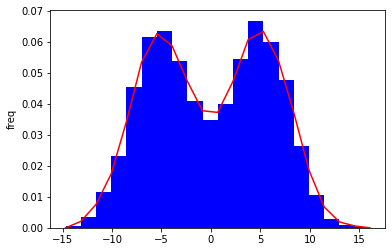

In [199]:
cnt, edges = np.histogram(x, bins=nBins, density=True)
    
fig, ax = plt.subplots()
    
ax.hist(x, bins=nBins, align='mid', color='blue', density=True)
ax.set(ylabel='freq')
hist_dist = scipy.stats.rv_histogram((cnt, edges))
pdf = hist_dist.pdf(edges)

n_mean = 1
smoothed_pdf = np.zeros(pdf.size)
for i in range(n_mean, smoothed_pdf.size - n_mean):
    smoothed_pdf[i] = np.mean(pdf[i-n_mean:i+n_mean])  
ax.plot(edges, smoothed_pdf, c='r')  

In [200]:
probValues = pdf*h
probValues[0] /= 2
probValues[-1] /= 2

#while np.sum(probValues) > 1.:
#    probValues *= .99

sum_probValues = np.sum(probValues)
if sum_probValues < 1.:
    probValues[1:-1] += (1. - sum_probValues)/(len(probValues)-2)

In [201]:
from scipy import stats
discrete_rv = stats.rv_discrete(values=(edges, probValues))

In [202]:
def getSampleFromPdf(edges, probValues, h):
    sample = np.random.choice(edges, p=probValues)
    if sample < edges[1]:
        uniformSample = np.random.uniform(edges[0], edges[0]+h/2.)
    elif sample > edges[-2]:
        uniformSample = np.random.uniform(edges[-1]-h/2., edges[-1])
    else:
        uniformSample = np.random.uniform(sample-h/2., sample+h/2.)
    return uniformSample

In [203]:
n_samples = 10000
x_samples = [getSampleFromPdf(edges, probValues, h) for i in range(n_samples)]

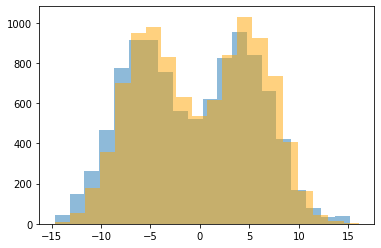

In [204]:
fig, ax = plt.subplots()

_ = ax.hist(x_samples, alpha=.5, bins=20)
_ = ax.hist(x, alpha=.5, bins=20, color='orange')

https://scicomp.stackexchange.com/questions/1658/define-custom-probability-density-function-in-python